## Objetivos:
 - Carregar os dados(arquivos .csv da pasta /base_trabalho_pratico) em um esquema conforme imagem abaixo.
 - SQLLite - Como engine de Banco de dados.
 - Não utilizado o SqlAlchemy, para manter as coisa simples 😜
 - Responder algumas perguntas de negocio. 

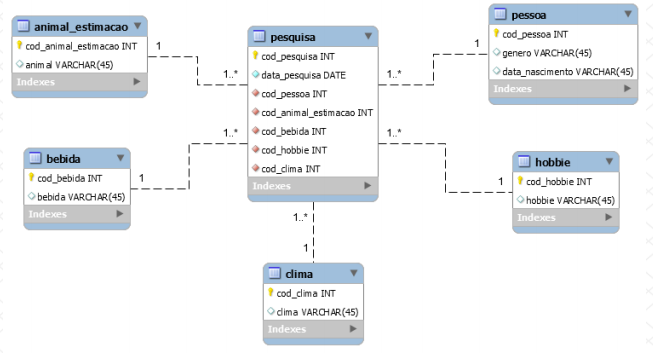

In [1]:
##IMAGENS:
from IPython import display 
display.Image("Modelo_de_dados.PNG")

In [2]:
import pandas as pd
import os
import sqlite3
from pathlib import Path
from datetime import date

# CARREGA DO ARQUIVO
dir = Path(".\\base_trabalho_pratico")

df = (pd.read_csv(f,encoding='latin1', sep='|', index_col='cod_pessoa') for f in dir.glob("*.csv"))
df = pd.concat(df)
df.reset_index(inplace=True)

def calculate_age(born):
    #today = date.today()
    today = date(2021, 3, 15)
    born2 = pd.to_datetime(born,format='%Y-%m-%d')
    return today.year - born2.year - ((today.month, today.day) < (born2.month, born2.day))
df['age'] = df['data_nascimento'].apply(calculate_age)

In [ ]:
#con.close()  #  caso precise fechar a conexão

In [3]:
## CRIA O BANCO NO SQLITE: REMOVE O BANCO DE DADOS, CASO JÁ EXISTA
db_name = "pesquisa_preferencia_pessoal.db"
os.remove(db_name) if os.path.exists(db_name) else None
con = sqlite3.connect(db_name)
cur = con.cursor()

In [4]:
## FUNÇÃO "MÁGICA" PARA CARGA DA TABELA FATO: Busca no banco o código de um registro
def consulta_codigo(codigo, tabela, campo, filtro):
    '''
    codigo = campo da tabela com o código
    tabela = tabela do banco da dados
    campo  = campo do filtro
    filtro = filtro que será aplicado
    '''
    sql  = "select {} from {} where {} = '{}'".format(codigo.lower(),tabela.lower(),campo.lower(),filtro)
    ## TESTES: VALIDA CONSULTA SQL
    #print(sql)
    cur.execute(sql)
    for linha in cur.fetchall():
        return(linha[0])

## TESTES CHAMADA FUNÇÃO MAGICA:
#consulta_codigo('cod_animal_estimacao','animal_estimacao','animal','peixe')
#consulta_codigo('cod_bebida ','bebida ','bebida ', 'refrigerante')
#consulta_codigo('cod_hobie ','hobie ','hobbie ','Assistir TV')

In [5]:
# Cria uma instrução sql #TABELA ANIMAL_ESTIMACAO
sql_create = 'create table if not exists animal_estimacao '\
'(cod_animal_estimacao integer primary key, '\
'animal varchar(45) )'
# Executando a instrução sql no cursor
cur.execute(sql_create)
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into animal_estimacao values (?, ?)'
for value in enumerate(df['animal_estimacao'].drop_duplicates().to_list(), start=1):
    ## TESTES: Espia dados carregados no banco:
    print (value)
    cur.execute(sql_insert, value)
con.commit()

(1, 'peixe')
(2, 'tartaruga')
(3, 'gato')
(4, 'cachorro')


In [6]:
# Cria uma instrução sql #TABELA BEBIDA
sql_create = 'create table if not exists bebida '\
'(cod_bebida integer primary key, '\
'bebida varchar(45) )'
# Executando a instrução sql no cursor
cur.execute(sql_create)
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into bebida values (?, ?)'
for value in enumerate(df['bebida_favorita'].drop_duplicates().to_list(), start=1):
    ## TESTES: Espia dados carregados no banco:
    print (value)
    cur.execute(sql_insert, value)
con.commit()

(1, 'Cerveja')
(2, 'Café')
(3, 'refrigerante')
(4, 'Água')
(5, 'Vinho')
(6, 'Chá')


In [7]:
# Cria uma instrução sql #TABELA CLIMA
sql_create = 'create table if not exists clima '\
'(cod_clima integer primary key, '\
'clima varchar(45) )'
# Executando a instrução sql no cursor
cur.execute(sql_create)
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into clima values (?, ?)'
for value in enumerate(df['clima'].drop_duplicates().to_list(), start=1):
    ## TESTES: Espia dados carregados no banco:
    print (value)
    cur.execute(sql_insert, value)
con.commit()

(1, 'frio')
(2, 'quente')
(3, 'moderado')


In [8]:
# Cria uma instrução sql #TABELA HOBIE
sql_create = 'create table if not exists hobbie '\
'(cod_hobbie integer primary key, '\
'hobbie varchar(45) )'
# Executando a instrução sql no cursor
cur.execute(sql_create)
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into hobbie values (?, ?)'
for value in enumerate(df['hobbies'].drop_duplicates().to_list(), start=1):
    ## TESTES: Espia dados carregados no banco:
    print (value)
    cur.execute(sql_insert, value)
con.commit()

(1, 'Praticar esporte')
(2, 'Assistir TV')
(3, 'Ler livros')
(4, 'Aprender algo novo')
(5, 'Escrever')
(6, 'Pintar quadros')
(7, 'Dormir')
(8, 'Escutar música')


In [9]:
# Cria uma instrução sql #TABELA PESSOA
sql_create = 'create table if not exists pessoa '\
'(cod_pessoa integer primary key, '\
'genero varchar(45), '\
'data_nascimento varchar(45) )'
# Executando a instrução sql no cursor
cur.execute(sql_create)
# Criando outra sentença SQL para inserir registros
#cod_pessoa	data_coleta	genero	data_nascimento
sql_insert = 'insert into pessoa values (?, ?, ?)'
for index, row in df[['cod_pessoa', 'genero','data_nascimento']].iterrows():
    ## TESTES: Espia dados carregados no banco:
    print(row[0],row[1],row[2])
    my_list =[row[0],row[1],row[2]]
    cur.execute(sql_insert, my_list)
con.commit()

10141743 Masculino 1981-04-25
10141860 Feminino 1966-01-19
10142548 Masculino 1973-08-02
10142591 Masculino 1997-03-05
10142654 Feminino 1969-08-05
10141523 Feminino 1998-09-24
10141996 Feminino 1973-03-13
10142089 Feminino 1970-03-23
10142145 Masculino 1998-08-01
10142520 Masculino 1994-05-09
10143160 Feminino 1967-09-18
10141712 Masculino 1951-08-13
10141987 Feminino 1978-04-23
10142093 Masculino 1986-09-03
10142325 Masculino 1965-10-18
10142552 Masculino 1982-06-27
10142598 Masculino 1953-09-27
10143013 Masculino 1959-04-01
10141570 Feminino 1953-11-09
10141851 Feminino 1977-10-24
10141938 Feminino 1957-03-05
10142733 Masculino 1978-01-12
10142851 Masculino 1982-12-22
10142941 Masculino 1966-04-19
10143484 Masculino 1976-05-31
10141877 Feminino 1963-05-24
10142310 Masculino 1978-08-22
10142471 Masculino 1979-02-23
10142597 Masculino 1981-07-18
10143070 Masculino 1989-09-24
10143526 Feminino 1964-05-10
10141671 Feminino 1963-12-28
10142969 Feminino 1956-04-03
10143233 Masculino 1987-

In [10]:
# Cria uma instrução sql #TABELA FATOS: PESQUISA
sql_create = 'create table if not exists pesquisa '\
'(cod_pesquisa integer primary key, '\
'data_pesquisa datetime , '\
'cod_pessoa integer, '\
'cod_animal_estimacao integer, '\
'cod_bebida integer, '\
'cod_hobie integer, '\
'cod_clima integer )'
# Executando a instrução sql no cursor
cur.execute(sql_create)

In [11]:
sql_insert = 'insert into pesquisa values (?, ?, ?, ?, ?, ?, ?)'
## CARREGA FATO PESSOA
# indice:                  0             1          2            3                 4             5          6               7
for index, row in df[['cod_pessoa','data_coleta','genero','data_nascimento','animal_estimacao','clima','bebida_favorita','hobbies']].iterrows():
    cod_pesquisa = index
    data_pesquisa = row[1]
    cod_pessoa = row[0]
    cod_animal = consulta_codigo('cod_animal_estimacao','animal_estimacao','animal', row[4])
    cod_bebida = consulta_codigo('cod_bebida ','bebida ','bebida ', row[6])
    cod_hobbie = consulta_codigo('cod_hobbie','hobbie','hobbie', row[7])
    cod_clima = consulta_codigo('cod_clima','clima','clima', row[5])
    ## TESTES: Espia dados carregados no banco:
    print(cod_pesquisa, data_pesquisa, cod_pessoa,  row[4], '=>', cod_animal, row[6], '=>', cod_bebida, row[7], '=>', cod_hobbie, row[5], '=>', cod_clima)
    my_list =[cod_pesquisa, data_pesquisa, cod_pessoa, cod_animal, cod_bebida, cod_hobbie, cod_clima]
    cur.execute(sql_insert, my_list)
con.commit()

0 2020-01-01 10141743 peixe => 1 Cerveja => 1 Praticar esporte => 1 frio => 1
1 2020-01-01 10141860 peixe => 1 Café => 2 Assistir TV => 2 quente => 2
2 2020-01-01 10142548 tartaruga => 2 Café => 2 Ler livros => 3 frio => 1
3 2020-01-01 10142591 gato => 3 Cerveja => 1 Aprender algo novo => 4 moderado => 3
4 2020-01-01 10142654 tartaruga => 2 Café => 2 Assistir TV => 2 moderado => 3
5 2020-01-02 10141523 gato => 3 Cerveja => 1 Aprender algo novo => 4 quente => 2
6 2020-01-02 10141996 tartaruga => 2 refrigerante => 3 Escrever => 5 quente => 2
7 2020-01-02 10142089 gato => 3 Água => 4 Pintar quadros => 6 moderado => 3
8 2020-01-02 10142145 peixe => 1 refrigerante => 3 Escrever => 5 frio => 1
9 2020-01-02 10142520 peixe => 1 Café => 2 Praticar esporte => 1 moderado => 3
10 2020-01-02 10143160 tartaruga => 2 Vinho => 5 Dormir => 7 moderado => 3
11 2020-01-03 10141712 peixe => 1 Chá => 6 Praticar esporte => 1 moderado => 3
12 2020-01-03 10141987 cachorro => 4 Chá => 6 Escrever => 5 frio => 1


In [12]:
# Criando outra sentença SQL para selecionar registros
sql_select = "select count(*) from pesquisa p, hobbie h where h.cod_hobbie == p.cod_hobie and h.hobbie == 'Praticar esporte'  "
cur.execute(sql_select)
dados = cur.fetchall()
dados

[(268,)]

In [14]:
#  script que retorna o número de homens e mulheres que nasceram a partir do mês de outubro de 1990 e que gostam de Água:
sql_select = "select genero, beb.bebida, count(pes.cod_pessoa) as qtd \
from pesquisa p \
join pessoa pes on p.cod_pessoa = pes.cod_pessoa \
join bebida beb on beb.cod_bebida = p.cod_bebida \
where pes.data_nascimento >= '1990-10-01' \
and beb.bebida = 'Água' \
group by pes.genero, beb.bebida" 
cur.execute(sql_select)
dados = cur.fetchall()
dados

[('Feminino', 'Água', 18), ('Masculino', 'Água', 36)]

In [15]:
# Criando outra sentença SQL para selecionar registros
sql_select = "select count(*) from pesquisa p, pessoa pe where pe.cod_pessoa == p.cod_pessoa and pe.genero == 'Feminino' "
cur.execute(sql_select)
dados = cur.fetchall()
dados

[(729,)]

In [16]:
con.close()  #  caso precise fechar a conexão

### Queries em Pandas DataFrame:

In [20]:
df[['hobbies']].query("hobbies == 'Praticar esporte' ").count()

hobbies    268
dtype: int64

In [21]:
#Qual a média de idade das pessoas do gênero masculino e feminino, respectivamente, que gostam de chá e clima frio?
df[['bebida_favorita','clima','genero','age']].query("bebida_favorita == 'Chá' & clima =='frio' ").groupby('genero').mean('age')

,age
genero,
Feminino,48.418182
Masculino,43.051282


In [22]:
#Qual o hobbie de maior preferência entre as mulheres?
df[['genero','hobbies']].query("genero == 'Feminino' ").groupby('hobbies').count().sort_values('genero' , ascending=False)[:5]

,genero
hobbies,
Escutar música,103
Escrever,94
Praticar esporte,93
Dormir,92
Assistir TV,90


In [23]:
df['animal_estimacao'].drop_duplicates().to_list()

['peixe', 'tartaruga', 'gato', 'cachorro']

In [24]:
# Qual é a média de idade de homens e mulheres que gostam de tartaruga e tem como hobbie escrever
df[['animal_estimacao','hobbies','genero','age']].query("animal_estimacao == 'tartaruga' & hobbies =='Escrever' ").groupby('genero').mean('age')

,age
genero,
Feminino,49.440000
Masculino,47.947368


In [25]:
# Qual a bebida favorita entre os homens e mulheres, respectivamente?
df[['bebida_favorita','genero']].query("genero == 'Masculino' ").groupby('bebida_favorita').count().sort_values('genero' , ascending=False)[:5]

,genero
bebida_favorita,
Café,258
Cerveja,250
refrigerante,226
Chá,223
Água,222


In [26]:
df[['bebida_favorita','genero']].query("genero == 'Feminino' ").groupby('bebida_favorita').count().sort_values('genero' , ascending=False)[:5]

,genero
bebida_favorita,
Cerveja,138
Café,125
Chá,125
refrigerante,124
Vinho,114


In [27]:
df['hobbies'].drop_duplicates().to_list()

['Praticar esporte',
 'Assistir TV',
 'Ler livros',
 'Aprender algo novo',
 'Escrever',
 'Pintar quadros',
 'Dormir',
 'Escutar música']

In [28]:
#Quantas pessoas tem como Hobbie assistir TV, e qual a sua média de idade?
df[['hobbies']].query("hobbies =='Assistir TV' ").count()

hobbies    263
dtype: int64

In [29]:
df[['hobbies','age']].query("hobbies =='Assistir TV' ").mean()

age    44.768061
dtype: float64

In [30]:
df['bebida_favorita'].drop_duplicates().to_list()

['Cerveja', 'Café', 'refrigerante', 'Água', 'Vinho', 'Chá']

In [ ]:
## O Script abaixo só funciona apartir do Jupyter Notebook
#!pip install pixiedust
#import pixiedust
#display(df)